<a href="https://colab.research.google.com/github/CS7140/PA-3/blob/master/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rajesh Sakhamuru
# **Performance of Different Hidden Layer Sizes for 2 Different Classifications**

In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations

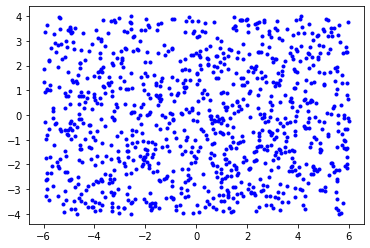

In [2]:
x1 = np.random.uniform(-6,6,1000)
x2 = np.random.uniform(-4,4,1000)

x1 = np.array([x1]).T
x2 = np.array([x2]).T

dataSet = np.concatenate((x1,x2),axis=1)
                    
plt.plot(x1, x2, 'b.')
plt.show()


In [1]:
def generateData(n):
    x1 = np.random.uniform(-6,6,n)
    x2 = np.random.uniform(-4,4,n)

    x1 = np.array([x1]).T
    x2 = np.array([x2]).T

    return np.concatenate((x1,x2),axis=1)

### Panel A and Panel B are the two classification scenarios being considered:

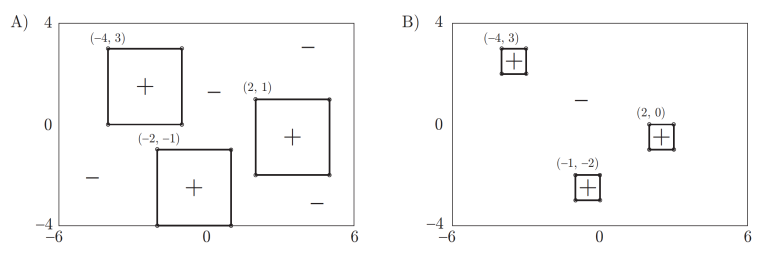

In [4]:
def labelA(data):
    
    data = np.append(data, -1 * np.ones([len(data),1]),1)

    mask1 = np.logical_and(data[:,0] >= -4, data[:,0] <= -1)
    mask1 = np.logical_and(mask1, data[:,1] >= 0)
    mask1 = np.logical_and(mask1, data[:,1] <= 3)

    data[mask1] *= [1,1,-1]


    mask2 = np.logical_and(data[:,0] >= -2, data[:,0] <= 1)
    mask2 = np.logical_and(mask2, data[:,1] >= -4)
    mask2 = np.logical_and(mask2, data[:,1] <= -1)

    data[mask2] *= [1,1,-1]


    mask3 = np.logical_and(data[:,0] >= 2, data[:,0] <= 5)
    mask3 = np.logical_and(mask3, data[:,1] >= -2)
    mask3 = np.logical_and(mask3, data[:,1] <= 1)

    data[mask3] *= [1,1,-1]
    
    return data
    
def labelB(data):
    data = np.append(data, -1 * np.ones([len(data),1]),1)

    mask1 = np.logical_and(data[:,0] >= -4, data[:,0] <= -3)
    mask1 = np.logical_and(mask1, data[:,1] >= 2)
    mask1 = np.logical_and(mask1, data[:,1] <= 3)

    data[mask1] *= [1,1,-1]

    mask2 = np.logical_and(data[:,0] >= -1, data[:,0] <= 0)
    mask2 = np.logical_and(mask2, data[:,1] >= -3)
    mask2 = np.logical_and(mask2, data[:,1] <= -2)

    data[mask2] *= [1,1,-1]

    mask3 = np.logical_and(data[:,0] >= 2, data[:,0] <= 3)
    mask3 = np.logical_and(mask3, data[:,1] >= -1)
    mask3 = np.logical_and(mask3, data[:,1] <= 0)

    data[mask3] *= [1,1,-1]

    return data

Datasets A and B are labeled based on Panel A and Panel B from Question 2 respectively.

In [5]:
dataSetA = labelA(dataSet)
dataSetB = labelB(dataSet)

In [6]:
def modelDataAndTest(data, layerSizes, epochs=1000, batch_size=50, verbose=2, print_predicted=20):
    np.random.shuffle(data)
    
    # Covert to 0 and 1 output rather than -1 and 1, because binary_crossentropy 
    # loss function doesnt work with -1
    data[data[:,2] == -1] *= [1,1,0]

    X = data[:,:2]
    Y = data[:,2]

    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

    model = tf.keras.Sequential()

    for n in range(len(layerSizes)):
        if n == 0:
            model.add(layers.Dense(layerSizes[n], input_dim=2, activation=activations.tanh))
            continue
        elif n == len(layerSizes)-1:
            model.add(layers.Dense(layerSizes[n], activation=activations.sigmoid))
            continue
        else:
            model.add(layers.Dense(layerSizes[n], activation=activations.tanh))

    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    predictions = model.predict(X_test)
    if print_predicted > 0:
        print("\nFirst", print_predicted, "cases predicted vs expected:")
    for i in range(print_predicted):
        print(X_test[i].tolist()," ==> ", predictions[i], round(float(predictions[i])), "(Expected:", y_test[i],")")

    
    _, accuracy, AUC = model.evaluate(X_test, y_test, verbose=0)
    if verbose != 0:
        print('\nTest Accuracy:', (accuracy*100), ", ROC curve (AUC):", AUC)

    return model, accuracy, AUC

# Performance of Different Hidden Layer Sizes for 2 Different Classifications
Here we run 10-fold cross validation on the 6 possible hidden-layer combinations and average the Accuracies and AUCs. For each network, the first layer is 8 neurons, and the output layer is a single binary neuron. The reason the first layer is 8 neurons, is because when using less than 8 the accuracy is too low for all of the  hidden-layer combinations.

Below are the performance metrics for panel A (concept A with the 3x3 positive panels) followed by metrics for panel B (with 1x1 positive panels):

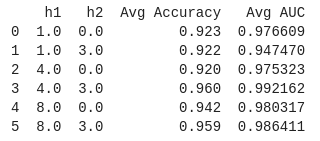

As we can see from the panel A accuracy and AUC, having 2 hidden layers performs better than just 1, for this dataset, except in the case of h1=1 and h2=3, which surprisingly performs worse than when h1=1 and h2=0. The best performing combination of hidden layers is when h1=4 and h2=3, which performs very similarly to h1=8 and h2=3, which indicates that having a second layer is beneficial, but also having more neurons in h1 doesn't necessarily mean that accuracy or AUC will be much better.

Panel B results:

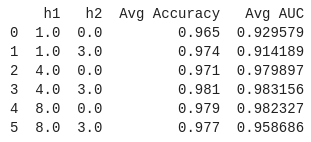

As we can see from the results of Panel B, the accuracy is in the high 90s as expected for all hidden layer combinations, but this doesn't tell us much because there are very few datapoints which are positive, roughly only 3%, relative to negative. What we can analyze is the average AUC, which illustrates how well the two groups can be distinguished from one-another. AUC is highest, and fairly similar at h1=4 & h2=3 and h1=8 & h2=0 and h1=8 & h2=3. This is indicative that given these hidden layer configurations, the network is best able to distinguish between the two groups of data present.

In [7]:
h1 = [1,4,8]
h2 = [0,3]

dfA = pd.DataFrame(columns = ["h1", "h2", "Avg Accuracy", "Avg AUC"])

for j in h1:
    for k in h2:
        layerSizes = [8,j,k,1]
        if 0 in layerSizes:    
            layerSizes.remove(0)
        avgAcc = 0
        avgAUC = 0
        for i in range(10):
            _, accuracy, AUC = modelDataAndTest(dataSetA, layerSizes, verbose = 0, epochs=1000, print_predicted=0)
            avgAcc += accuracy
            avgAUC += AUC

        avgAcc /= 10
        avgAUC /= 10
        dfA.loc[len(dfA)] = [j, k, avgAcc, avgAUC]


print(dfA)

    h1   h2  Avg Accuracy   Avg AUC
0  1.0  0.0         0.901  0.955530
1  1.0  3.0         0.911  0.954651
2  4.0  0.0         0.943  0.988346
3  4.0  3.0         0.951  0.987962
4  8.0  0.0         0.922  0.980891
5  8.0  3.0         0.949  0.986361


In [8]:
h1 = [1,4,8]
h2 = [0,3]

dfB = pd.DataFrame(columns = ["h1", "h2", "Avg Accuracy", "Avg AUC"])

for j in h1:
    for k in h2:
        layerSizes = [8,j,k,1]
        if 0 in layerSizes:    
            layerSizes.remove(0)
        avgAcc = 0
        avgAUC = 0
        for i in range(10):
            _, accuracy, AUC = modelDataAndTest(dataSetB, layerSizes, verbose = 0, epochs=1000, print_predicted=0)
            avgAcc += accuracy
            avgAUC += AUC

        avgAcc /= 10
        avgAUC /= 10
        dfB.loc[len(dfB)] = [j, k, avgAcc, avgAUC]


print(dfB)

    h1   h2  Avg Accuracy   Avg AUC
0  1.0  0.0         0.973  0.645827
1  1.0  3.0         0.971  0.881771
2  4.0  0.0         0.967  0.832189
3  4.0  3.0         0.982  0.704797
4  8.0  0.0         0.979  0.857810
5  8.0  3.0         0.972  0.935074


# Heatmap for Each Hidden-Layer Combination:
The heatmaps generated are below:

In [7]:
def modelDataAndTestALLDATA(data, layerSizes, epochs=1000, batch_size=50, verbose=2, print_predicted=20):
    np.random.shuffle(data)
    
    # Covert to 0 and 1 output rather than -1 and 1, because binary_crossentropy 
    # loss function doesnt work with -1
    data[data[:,2] == -1] *= [1,1,0]

    X = data[:,:2]
    Y = data[:,2]

    model = tf.keras.Sequential()

    for n in range(len(layerSizes)):
        if n == 0:
            model.add(layers.Dense(layerSizes[n], input_dim=2, activation=activations.tanh))
            continue
        elif n == len(layerSizes)-1:
            model.add(layers.Dense(layerSizes[n], activation=activations.sigmoid))
            continue
        else:
            model.add(layers.Dense(layerSizes[n], activation=activations.tanh))

    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

    model.fit(X, Y, epochs=epochs, batch_size=batch_size, verbose=verbose)

    predictions = model.predict(X)
    if print_predicted > 0:
        print("\nFirst", print_predicted, "cases predicted vs expected:")
    for i in range(print_predicted):
        print(X[i].tolist()," ==> ", predictions[i], round(float(predictions[i])), "(Expected:", Y[i],")")

    
    _, accuracy, AUC = model.evaluate(X, Y, verbose=0)
    if verbose != 0:
        print('\nTest Accuracy:', (accuracy*100), ", ROC curve (AUC):", AUC)

    return model, accuracy, AUC

THE FOLLOWING HEATMAPS ARE FOR CONCEPT PANEL A:


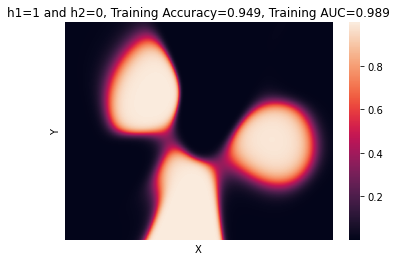

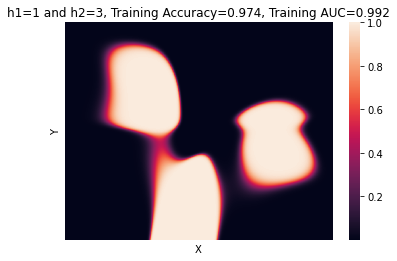

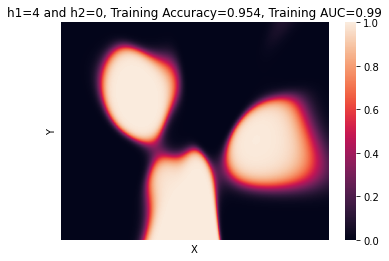

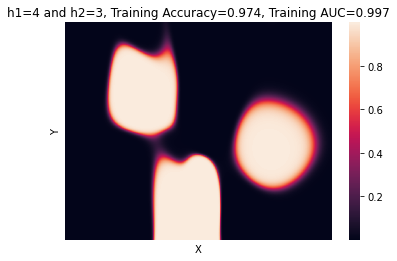

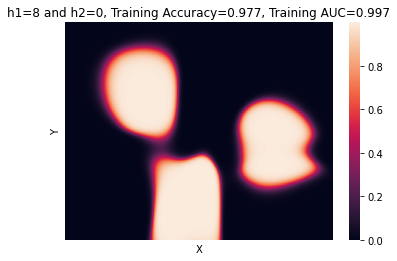

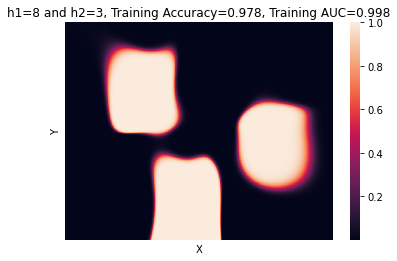

In [16]:
print("THE FOLLOWING HEATMAPS ARE FOR CONCEPT PANEL A:")
h1 = [1,4,8]
h2 = [0,3]

#generate data that is NOT trained on.
x1 = np.linspace(-6, 6, 1200)
x2 = np.linspace(-4, 4, 800)
a, b = np.meshgrid(x1, x2)
m = a.ravel()
n = b.ravel()
z = np.vstack((m, n))
heatmapData = z.T

for j in h1:
    for k in h2:
        layerSizes = [8,j,k,1]
        if 0 in layerSizes:    
            layerSizes.remove(0)
        model, accuracy, AUC = modelDataAndTestALLDATA(dataSetA, layerSizes, verbose = 0, epochs=1000, print_predicted=0)
        predictions = model.predict(heatmapData)

        heatmapPredictions = np.concatenate((heatmapData,predictions),axis=1)

        df = pd.DataFrame(heatmapPredictions, columns=['X','Y','val'])
        table = df.pivot('Y', 'X', 'val')
        ax = sns.heatmap(table, xticklabels=100, yticklabels=100)
        ax.invert_yaxis()
        plt.title("h1="+str(j)+" and h2="+str(k)+", Training Accuracy="+str(round(accuracy,3))+", Training AUC="+str(round(AUC,3)))
        plt.xticks([])
        plt.yticks([])
        plt.show()


THE FOLLOWING HEATMAPS ARE FOR CONCEPT PANEL B:


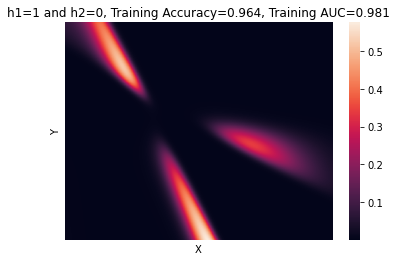

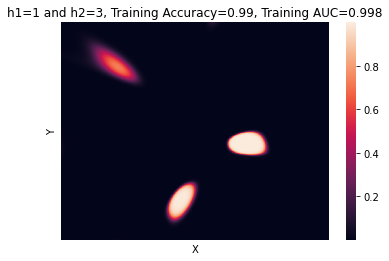

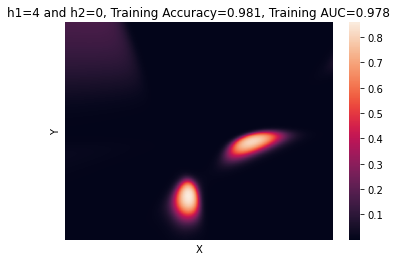

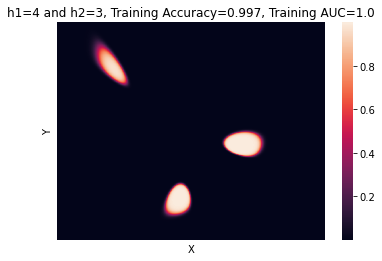

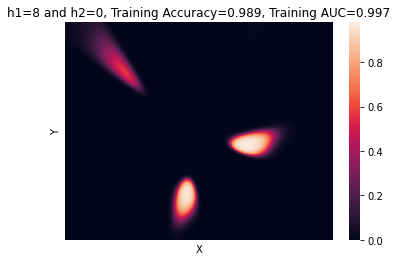

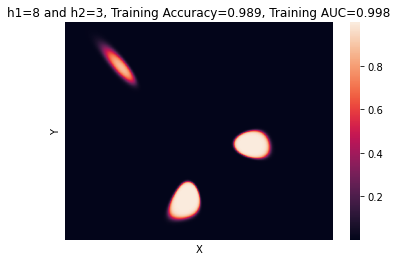

In [19]:
print("THE FOLLOWING HEATMAPS ARE FOR CONCEPT PANEL B:")
h1 = [1,4,8]
h2 = [0,3]

#generate data that is NOT trained on.
x1 = np.linspace(-6, 6, 1200)
x2 = np.linspace(-4, 4, 800)
a, b = np.meshgrid(x1, x2)
m = a.ravel()
n = b.ravel()
z = np.vstack((m, n))
heatmapData = z.T

for j in h1:
    for k in h2:
        layerSizes = [8,j,k,1]
        if 0 in layerSizes:    
            layerSizes.remove(0)
        model, accuracy, AUC = modelDataAndTestALLDATA(dataSetB, layerSizes, verbose = 0, epochs=1000, print_predicted=0)
        predictions = model.predict(heatmapData)

        heatmapPredictions = np.concatenate((heatmapData,predictions),axis=1)

        df = pd.DataFrame(heatmapPredictions, columns=['X','Y','val'])
        table = df.pivot('Y', 'X', 'val')
        ax = sns.heatmap(table, xticklabels=100, yticklabels=100)
        ax.invert_yaxis()
        plt.title("h1="+str(j)+" and h2="+str(k)+", Training Accuracy="+str(round(accuracy,3))+", Training AUC="+str(round(AUC,3)))
        plt.xticks([])
        plt.yticks([])
        plt.show()

# Increasing Hidden Layer Size and Training Data:

For both Panel A and Panel B, using h1=12 and h2=3 results in almost perfect performance of the neural network model classifier (as can be seen in the graphs below). The reasoning behind choosing h1=12 is because 3 square areas in both panels have a total of 12 sides, and thus 12 lines can be drawn to perfectly separate the data, and h2=3 could be better because there are 3 different locations in which the '+' data appears on the heatmap, and these lines could further separate and outline boundaries between them.

When increasing neural nodes to h1=24 and h2=9, there is an insignificant change in performance, which indicates that despite having many more neurons, it is just fitting around the exact same data boundaries when h1=12 and h2=3 and not adding really improving any sort of classification that is being done.

Please see the heatmaps below:

Train Accuracy: 0.982
Train AUC: 0.998


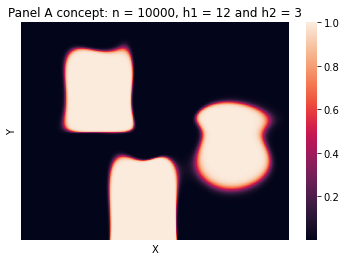


-----
Train Accuracy: 0.996
Train AUC: 1.0


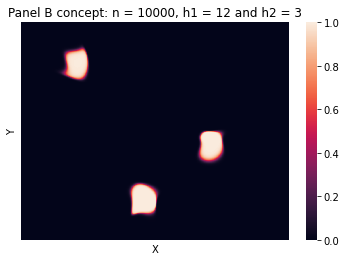

In [20]:
#generate training data for generated heatmaps:
heatmapTrainData = generateData(10000)
heatmapDataA = labelA(heatmapTrainData)
heatmapDataB = labelB(heatmapTrainData)

#generate testing data for generating heatmaps:
x1 = np.linspace(-6, 6, 1200)
x2 = np.linspace(-4, 4, 800)
a, b = np.meshgrid(x1, x2)
m = a.ravel()
n = b.ravel()
z = np.vstack((m, n))
heatmapData = z.T


model, accuracy, AUC = modelDataAndTestALLDATA(heatmapDataA, [8,12,3,1], verbose = 0, epochs=1000, batch_size=500, print_predicted=0)
print("Train Accuracy:", round(accuracy,3))
print("Train AUC:", round(AUC,3))

predictions = model.predict(heatmapData)

heatmapPredictions = np.concatenate((heatmapData,predictions),axis=1)

df = pd.DataFrame(heatmapPredictions, columns=['X','Y','val'])
table = df.pivot('Y', 'X', 'val')
ax = sns.heatmap(table, xticklabels=100, yticklabels=100)
ax.invert_yaxis()
plt.title("Panel A concept: n = 10000, h1 = "+str(12)+" and h2 = "+str(3))
plt.xticks([])
plt.yticks([])
plt.show()


model, accuracy, AUC = modelDataAndTestALLDATA(heatmapDataB, [8,12,3,1], verbose = 0, epochs=1000, batch_size=50, print_predicted=0)
print("\n-----\nTrain Accuracy:", round(accuracy,3))
print("Train AUC:", round(AUC,3))

predictions = model.predict(heatmapData)

heatmapPredictions = np.concatenate((heatmapData,predictions),axis=1)

df = pd.DataFrame(heatmapPredictions, columns=['X','Y','val'])
table = df.pivot('Y', 'X', 'val')
ax = sns.heatmap(table, xticklabels=100, yticklabels=100)
ax.invert_yaxis()
plt.title("Panel B concept: n = 10000, h1 = "+str(12)+" and h2 = "+str(3))
plt.xticks([])
plt.yticks([])
plt.show()

Train Accuracy: 0.992
Train AUC: 1.0


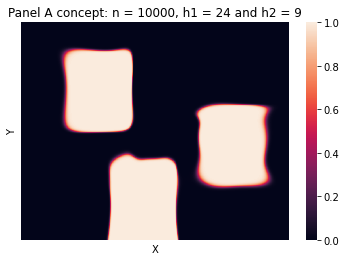


-----
Train Accuracy: 0.998
Train AUC: 1.0


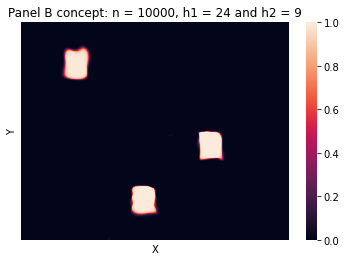

In [21]:
#generate training data for generated heatmaps:
heatmapTrainData = generateData(10000)
heatmapDataA = labelA(heatmapTrainData)
heatmapDataB = labelB(heatmapTrainData)

#generate testing data for generating heatmaps:
x1 = np.linspace(-6, 6, 1200)
x2 = np.linspace(-4, 4, 800)
a, b = np.meshgrid(x1, x2)
m = a.ravel()
n = b.ravel()
z = np.vstack((m, n))
heatmapData = z.T


model, accuracy, AUC = modelDataAndTestALLDATA(heatmapDataA, [8,24,9,1], verbose = 0, epochs=1000, batch_size=500, print_predicted=0)
print("Train Accuracy:", round(accuracy,3))
print("Train AUC:", round(AUC,3))

predictions = model.predict(heatmapData)

heatmapPredictions = np.concatenate((heatmapData,predictions),axis=1)

df = pd.DataFrame(heatmapPredictions, columns=['X','Y','val'])
table = df.pivot('Y', 'X', 'val')
ax = sns.heatmap(table, xticklabels=100, yticklabels=100)
ax.invert_yaxis()
plt.title("Panel A concept: n = 10000, h1 = "+str(24)+" and h2 = "+str(9))
plt.xticks([])
plt.yticks([])
plt.show()


model, accuracy, AUC = modelDataAndTestALLDATA(heatmapDataB, [8,24,9,1], verbose = 0, epochs=1000, batch_size=50, print_predicted=0)
print("\n-----\nTrain Accuracy:", round(accuracy,3))
print("Train AUC:", round(AUC,3))

predictions = model.predict(heatmapData)

heatmapPredictions = np.concatenate((heatmapData,predictions),axis=1)

df = pd.DataFrame(heatmapPredictions, columns=['X','Y','val'])
table = df.pivot('Y', 'X', 'val')
ax = sns.heatmap(table, xticklabels=100, yticklabels=100)
ax.invert_yaxis()
plt.title("Panel B concept: n = 10000, h1 = "+str(24)+" and h2 = "+str(9))
plt.xticks([])
plt.yticks([])
plt.show()